# Predicting 

## Introduction

### Authored by:
#### Team Name : UPMOST

Team Members: Ananya Kambhampati, Divya Mudigonda, Ajay Kumar Pendem, Divya Konakanchi.
### Description of the analysis

In this project, we are using a dataset containing Liver Patient from UCI's repository.

Our prediction task is to determine whether a person needs to be diagnosed for Cirrhosis Based on chemical compounds(bilirubin, albumin, proteins, alkaline phosphatase) present in human body.
We are using the input variables that include Age, Gender,TB(Total Bilirubin),DB(Direct Bilirubin),Alkphos(Alkaline Phosphatase),Sgpt(Alamine Aminotransferase),Sgot(Aspartate Aminotransferase) 
TP(Total Proteins),ALB(Albumin),A/G(Ratio Albumin)and Globulin Ratio Education.

The important Factor here is recall.

To conduct our analysis, we will utilize a set of Machine Learning Modules(k-nn, Descision Tree, RandomForest,XGBoost,Neural network, AdaBoost, and gradient boost).

## Preliminary (Business) Problem Scoping

We are developing a binary classifier to identify if a given person in the datasetneed to be diagnosed for Cirrhosis or not. Our positive case will therefore be Class1(Need's to be diagnosed) and Class0 (Does not need to be diagnosed) will be our negative case.

We will be trying out different models and check if we can develop a model that has sufficient predictive power to accurately 

## Step 1 - Importing the required packages

In [ ]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score# plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler

## Step 2: Load, clean and prepare data


### Step 2.1-Loading the data from data source

In [ ]:
# Loading the data file 
from google.colab import drive 
drive.mount('/content/gdrive')

patient_data=pd.read_csv('gdrive/My Drive/indian_liver_patient.csv')

patient_data.head(5)

Mounted at /content/gdrive


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result_data
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### Step 2.2- Data Exploration

In [ ]:
# Explore the dataset
# read the first row of the dataset 
print(patient_data.columns)
print(patient_data.describe())
print(patient_data.info())

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result_data'],
      dtype='object')
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  579.000000       579.000000        579.000000            579.000000   
mean    44.782383         3.315371          1.494128            291.366149   
std     16.221786         6.227716          2.816499            243.561863   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  A

### 2.3 Clean/transform data
Cleaning up column names
Our findings from the data exploration indicate the the data requires a renaming/cleanup of column names. 

In [ ]:
patient_data.columns = [s.strip() for s in patient_data.columns] 
patient_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result_data'],
      dtype='object')

### 2.4 Checking for null values

In [ ]:
patient_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Result_data                   0
dtype: int64

#### Transforming Gender column

In [ ]:
# Categorizing Gender column
patient_data['Gender'] = patient_data['Gender'].astype('category')
patient_data.dtypes

Age                              int64
Gender                        category
Total_Bilirubin                float64
Direct_Bilirubin               float64
Alkaline_Phosphotase             int64
Alamine_Aminotransferase         int64
Aspartate_Aminotransferase       int64
Total_Protiens                 float64
Albumin                        float64
Albumin_and_Globulin_Ratio     float64
Result_data                      int64
dtype: object

We will encode this data using OrdinalEncoder for the Gender column

In [ ]:
# Encode Gender column
le =LabelEncoder()
patient_data['Gender'] = le.fit_transform(patient_data['Gender'])
patient_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result_data
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
def show_corr(dataset, target_name, n_most=None):
    if n_most is None:
        n_most=len(dataset.columns.values)-1
    corr_matrix=dataset.corr().abs()
    
    most_correlated_features=corr_matrix[target_name].sort_values(ascending=False).drop(target_name)
       
    most_correlated_feature_names=most_correlated_features.index.values
    
    fig, ax=plt.subplots(figsize=(15,5))
    plt.xticks(rotation="90")
    sns.barplot(x=most_correlated_feature_names, y=most_correlated_features)
    plt.title("{} correlation with the independent variables".format(target_name))


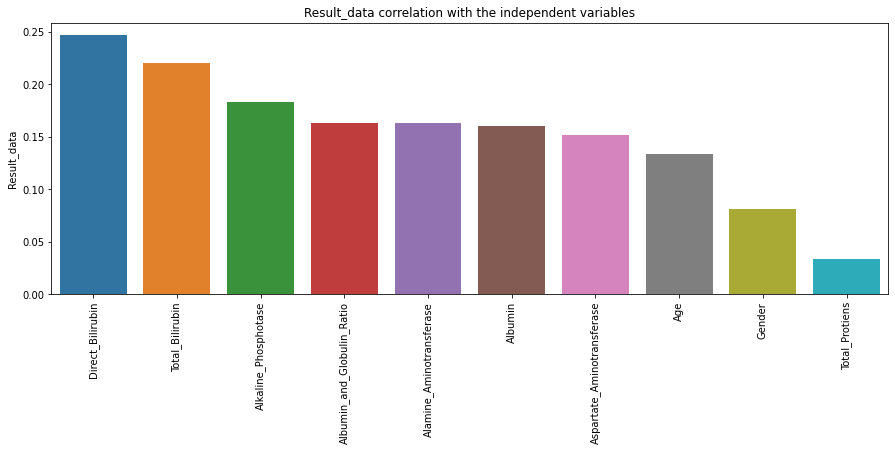

In [ ]:

    show_corr(dataset=patient_data, target_name='Result_data')

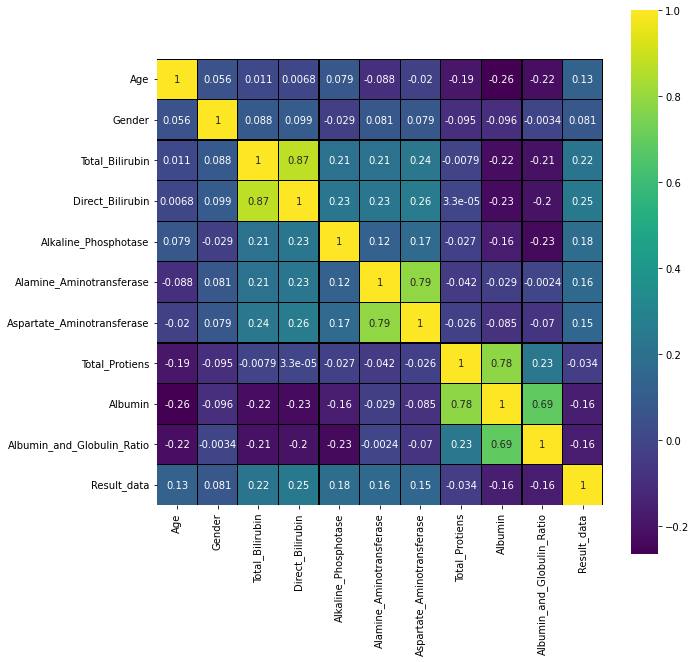

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(patient_data.corr(), annot=True,linewidths=0.25,vmax=1.0,cmap='viridis', linecolor='black',square=True)
plt.show()

### 2.4 Checking distribution of classes


In [ ]:
patient_data['Result_data'].value_counts()

1    414
0    165
Name: Result_data, dtype: int64

In [ ]:




X = patient_data.drop('Result_data', axis = 1).copy()

In [ ]:
y = patient_data['Result_data'].copy()

In [ ]:
X.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89


In [ ]:
y.head(3)

0    1
1    1
2    1
Name: Result_data, dtype: int64

## Step 3 Split data intro training and validation sets


#### Create the training set and the test set with a 70/30 split.
We've decided to utilize a training/test split of the data at 70% training and 30% testing. This percentage split ratio is inline with common practice for small to medium sized datasets, which this data represents. Moreover, we have decided not to do a three way data split, as we are only testing two models and we wish to allocated as much data as possible to training and validation steps.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### Balancing the Data
As we can see that, the positive values are almost thrice the count of the negative values,
our models wold tend to lean towards positive outcomes which would give us a biased outcome.In order to have relatively accurate prediction we need to balance our data. Here we used SMOTE technique in order to balance the data.


In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')

Text(0.5, 1.0, 'Outcome ytrain (SMOTE)')

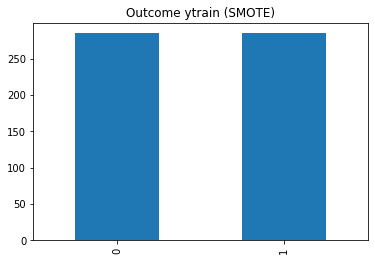

In [ ]:
X_train_new, y_train_new = oversample.fit_resample(X_train, y_train.ravel())
class_balance = pd.Series(y_train_new).value_counts().plot.bar()
class_balance.set_title("Outcome ytrain (SMOTE)")

In [ ]:
# random forest model creation
randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)
# predictions
randomforest_predict = randomforest.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, randomforest_predict))
print('\n')


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.48      0.36      0.41        45
           1       0.79      0.87      0.83       129

    accuracy                           0.74       174
   macro avg       0.64      0.61      0.62       174
weighted avg       0.71      0.74      0.72       174





In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.39      0.33      0.36        45
           1       0.78      0.82      0.80       129

    accuracy                           0.70       174
   macro avg       0.59      0.58      0.58       174
weighted avg       0.68      0.70      0.69       174





In [ ]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier()
train_model1 = model1.fit(X_train, y_train)


In [ ]:
pred1 = train_model1.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, pred1))
print('\n')


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        45
           1       0.76      0.81      0.79       129

    accuracy                           0.67       174
   macro avg       0.55      0.54      0.54       174
weighted avg       0.65      0.67      0.66       174





In [ ]:

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))




Classification Report
              precision    recall  f1-score   support

           0       0.39      0.31      0.35        45
           1       0.78      0.83      0.80       129

    accuracy                           0.70       174
   macro avg       0.58      0.57      0.57       174
weighted avg       0.68      0.70      0.68       174



In [ ]:
dtree=DecisionTreeClassifier(random_state=1)
dtree_fit= dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.35      0.44      0.39        45
           1       0.79      0.71      0.75       129

    accuracy                           0.64       174
   macro avg       0.57      0.58      0.57       174
weighted avg       0.67      0.64      0.66       174



In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)
print("Classification Report")
print(classification_report(y_test, ypred))

Classification Report
              precision    recall  f1-score   support

           0       0.32      0.33      0.33        45
           1       0.76      0.75      0.76       129

    accuracy                           0.64       174
   macro avg       0.54      0.54      0.54       174
weighted avg       0.65      0.64      0.65       174



## have to remove

## ML Models with default values 

In [ ]:
# Application of all Machine Learning methods
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('XGBoost', XGBClassifier()))
models.append(('GBoost', GradientBoostingClassifier()))

RF: 0.860997 (0.051014)
AdaBoost: 0.815297 (0.079342)
KNN: 0.811642 (0.054356)
DecisionTree: 0.752038 (0.059902)
XGBoost: 0.838180 (0.060958)
GBoost: 0.836235 (0.076771)


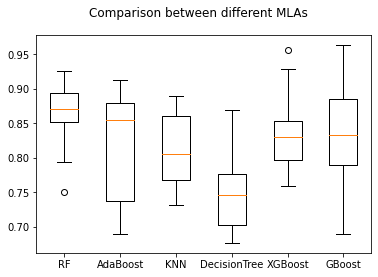

In [ ]:
# evaluate each model in turn
random_seed = 1
np.random.seed(random_seed)
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## DecisionTree

In [ ]:
dtree=DecisionTreeClassifier(random_state=1)
_ = dtree.fit(patient_data.drop(columns=['Result_data']), patient_data['Result_data'])

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
score_measure = 'recall'
k_fold = 3
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)



bestRecallTree = gridSearch.best_estimator_

recall score:  0.9017543859649123
parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 80}


In [ ]:
dtree_score = gridSearch.best_score_

NameError: ignored

## RandomForest

In [ ]:
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(1, 500, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 500, 50)]
min_samples_leaf = [int(x) for x in np.linspace(1, 100, 50)]
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]
param_grid_random = { 
                      'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }

In [ ]:
random_seed=11
randomtree_default = RandomForestClassifier(random_state=random_seed)

best_random_search_model = RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=random_seed), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 2000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1,
        random_state=random_seed
    )
best_random_search_rtree_model = best_random_search_model.fit(X_train, y_train)

In [ ]:
random_search_best_rtree_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_rtree_params)

Best parameters found:  {'min_samples_split': 418, 'min_samples_leaf': 97, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 166, 'max_depth': 113, 'criterion': 'entropy'}


In [ ]:
y_pred = best_random_search_rtree_model.predict(X_test)

print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred,average='weighted')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average='weighted')}")

print("************************************")

************************************
Recall Score:     0.7413793103448276
************************************
Accuracy Score:   0.7413793103448276
Precision Score:  0.5496432818073722
F1 Score:         0.6312734721748037
************************************


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## MLP Model

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(1000,1800,500), max_iter=5000, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=10,tol=0.000000001)
m2=clf.fit(X_train, y_train)

Iteration 1, loss = 7.24891955
Iteration 2, loss = 4.80861211
Iteration 3, loss = 4.24571640
Iteration 4, loss = 1.19064757
Iteration 5, loss = 0.67038129
Iteration 6, loss = 0.57392327
Iteration 7, loss = 0.62077326
Iteration 8, loss = 0.63469612
Iteration 9, loss = 0.69689517
Iteration 10, loss = 0.54064915
Iteration 11, loss = 0.57935782
Iteration 12, loss = 0.59919376
Iteration 13, loss = 0.58207346
Iteration 14, loss = 0.56805518
Iteration 15, loss = 0.63060948
Iteration 16, loss = 0.54395711
Iteration 17, loss = 0.53758530
Iteration 18, loss = 0.53503103
Iteration 19, loss = 0.54607251
Iteration 20, loss = 0.54073927
Iteration 21, loss = 0.53352181
Iteration 22, loss = 0.53003587
Iteration 23, loss = 0.59484062
Iteration 24, loss = 0.55187256
Iteration 25, loss = 0.55478242
Iteration 26, loss = 0.53210482
Iteration 27, loss = 0.55147476
Iteration 28, loss = 0.53167863
Iteration 29, loss = 0.62009447
Iteration 30, loss = 0.54707258
Iteration 31, loss = 0.53536359
Iteration 32, los

In [ ]:
y_pred_m2 =m2.predict(X_test)

In [ ]:
recall_score(y_test, y_pred_m2)

0.8217054263565892

## Gradient Boost

In [ ]:
n_estimators = [int(x) for x in np.linspace(1, 800, 5)]
learning_rate = [float(x) for x in np.linspace(1, 2, 1)]
max_depth = [int(x) for x in np.linspace(1, 800, 50)]
param_grid_random = { 'n_estimators': n_estimators,
                      'max_depth':max_depth
                     }

In [ ]:
random_seed=1
best_random_search_model = RandomizedSearchCV(
        estimator=GradientBoostingClassifier(random_state=random_seed), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 1000, 
        cv=10, 
        verbose=0,  
        n_jobs = -1,
        random_state=random_seed
    )
best_random_search_gb_model = best_random_search_model.fit(X_train_new, y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 250 is smaller than n_iter=1000. Running 250 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
random_search_best_gb_params = best_random_search_gb_model.best_params_
print('Best parameters found: ', random_search_best_gb_params)

Best parameters found:  {'n_estimators': 1, 'max_depth': 33}


In [ ]:
print("Best Recall score is {}".format(best_random_search_gb_model.best_score_))

Best Recall score is 0.7717980295566502


## AdaBoost

In [ ]:

#AdaBoostClassifier

param_grid = {
           'learning_rate': [0.001, 0.01, 0.1, 1.0],
           'n_estimators': [10, 50, 100, 250]
              }
best_grid_search_model = GridSearchCV(estimator=AdaBoostClassifier(random_state=3),
                                    scoring='recall', param_grid=param_grid, verbose=1,  n_jobs = -1)
_ = best_grid_search_model.fit(X_train_new, y_train_new)
print('recall', 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
recall score:  0.7508771929824561
parameters:  {'learning_rate': 1.0, 'n_estimators': 250}


## XGBoost

In [ ]:


param = {
        'classifier__min_child_weight': [1, 5, 10],
        'classifier__gamma': [0.5, 1, 1.5, 2, 5],
        'classifier__subsample': [0.6, 0.8, 1.0],
        'classifier__max_depth': [3, 4, 5],
        'classifier' : XGBClassifier()
        }

print(params)

{'n_estimators': [800], 'min_child_weight': [4, 5], 'gamma': [0.3, 0.4, 0.5], 'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 'max_depth': [2, 3, 4, 6, 7], 'objective': ['reg:squarederror', 'reg:tweedie'], 'booster': ['gbtree', 'gblinear'], 'eval_metric': ['rmse'], 'eta': [0.3, 0.4, 0.5]}


In [ ]:
random_seed=11
XGB_C = XGBClassifier(random_state=random_seed,objective='multi:softmax')
best_random_search_model = RandomizedSearchCV(
        estimator= XGB_C, 
        scoring='recall', 
        param_distributions=params, 
        n_iter = 200, 
        cv=5, 
        verbose=0, 
        n_jobs = -1,  )

In [ ]:
best_random_search_gb_model =best_random_search_model.fit(X_train_new, y_train_new)

In [ ]:
print("Best  score is {}".format(best_random_search_gb_model.best_score_))

Best  score is 0.775438596491228


k-NN Model

In [ ]:


criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(1, 500, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 500, 50)]
min_samples_leaf = [int(x) for x in np.linspace(1, 100, 50)]
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
min_impurity_decrease = [x for x in np.arange(0.0,0.001, 0.0001).round(5)]

param_grid_random = { 'n_neighbors': list(range(1,49,2)),
                     'metric': ['euclidean', 'cosine']
                     }                     

In [ ]:
random_seed=11
#dtree_default = KNeighborsClassifier(random_state=random_seed)
# change n_iter to 200_000 for full run
best_random_search_model = RandomizedSearchCV(
        estimator=KNeighborsClassifier(), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 200, 
        cv=10, 
        verbose=0, 
        n_jobs = -1,
        random_state=random_seed
    )
best_random_search_dtree_model = best_random_search_model.fit(X_train_new, y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 48 is smaller than n_iter=200. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
random_search_best_dtree_params = best_random_search_dtree_model.best_params_
print('Best parameters found: ', random_search_best_dtree_params)

Best parameters found:  {'n_neighbors': 1, 'metric': 'euclidean'}


In [ ]:
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid_random, cv=10, scoring='recall',
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train_new, y_train_new)
print('recall', 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_

recall score:  0.736576354679803
parameters:  {'metric': 'euclidean', 'n_neighbors': 1}
